In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/yujinxie/Desktop/cs396/yelp_dataset/'

### Data of Interest
Here we are interested in data inside business.json and review.json. Particularly speaking, it is "business_id", "city", "hours","categories", "name", "stars", "state" information in business.json, and "business_id", "date", "review_id", "stars", "text", "user_id" in review.json attracting our attention.

In [2]:
d1 = []
for l in open(path+"business.json").readlines():
        d1.append(json.loads(l))
df_bn = pd.DataFrame.from_records(d1)

In [3]:
d2 = []
for l in open(path+"review.json").readlines():
        d2.append(json.loads(l))
df_rv = pd.DataFrame.from_records(d2)

In [4]:
df_bn_ = df_bn.loc[:,["business_id", "city", "hours","categories", "name", "stars", "state"]] # 192609*7
df_rv_ = df_rv.loc[:,["business_id", "date", "review_id", "stars", "text", "user_id"]] # 6685900*6

In [5]:
df_use = pd.merge(df_bn_, df_rv_, on='business_id', how='outer') # Merge two useful dataframe on the same business_id.

### Data Preprocessing
Data cleaning: drop nan value, set every word with first letter captital

Data reorganizing: find 6 metropolitan areas containing cities in df_use["city"]

6 Metropolitan areas: Chicago, LA, Dallas, Miami, Boston, Atlanta.

In [6]:
df_use.dropna() # drop n/a value
df_use['city'] = df_use['city'].str.title() # set capital letter of each word

In [7]:
metro_areas = pd.read_csv(path+'metro.csv')

In [8]:
def checker(df, metro_city):
    raw_cities = df['city'].values
    dea_cities = []
    for raw_city in raw_cities:
        # for metro_city in metro_cities:
        if raw_city in metro_city:
            dea_cities.append(metro_city[0])
        else:
            dea_cities.append(0.0) 
    return dea_cities

In [9]:
metro_city = metro_areas["Chicago"].dropna().values  # array containing cities in Chicago metropolitan area
df1 = df_use
name_in = checker(df1, metro_city)
df1['metropolitan area'] = name_in
df1 = df1[df1['metropolitan area'] == "Chicago"]  # filter cities in Chicago metropolitan area
df1 = df1.reset_index(drop=True) 
# Select categories containing Food or Beer or Restaurant or Bakeries
df_chicago = df1[df1['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)  # select food category

In [119]:
df_chicago

business_id    city  \
0     JCMnL6-pbWmG7xSVkdBuoQ  Aurora   
1     JCMnL6-pbWmG7xSVkdBuoQ  Aurora   
2     JCMnL6-pbWmG7xSVkdBuoQ  Aurora   
3     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
4     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
5     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
6     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
7     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
8     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
9     G3OeHF5jrHvNqi4o3aNezQ  Aurora   
10    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
11    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
12    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
13    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
14    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
15    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
16    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
17    G3OeHF5jrHvNqi4o3aNezQ  Aurora   
18    DoWLGxBbR24_0r7mpGg__w  Aurora   
19    DoWLGxBbR24_0r7mpGg__w  Aurora   
20    DoWLGxBbR24_0r7mpGg__w  Aurora   
21    DoWLGxBbR24_0r7mpGg__w  Aurora   
22    DoWLGxBbR24_0r7mpGg__w  Aurora   
23    DoWLGxBbR24_0r7mpGg__w  Aurora   
24    DoWLGxBbR24_0r7mpGg__w  Aurora   
25    DoWLGxBbR24_0r7mpGg__w  Aurora   
26    DoWLGxBbR24_0r7mpGg__w  Aurora   
27    DoWLGxBbR24_0r7mpGg__w  Aurora   
28    DoWLGxBbR24_0r7mpGg__w  Aurora   
29    DoWLGxBbR24_0r7mpGg__w  Aurora   
...                      ...     ...   
4000  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4001  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4002  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4003  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4004  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4005  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4006  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4007  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4008  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4009  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4010  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4011  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4012  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4013  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4014  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4015  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4016  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4017  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4018  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4019  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4020  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4021  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4022  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4023  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4024  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4025  PO2ztFbgAMsf_F0TxjKwNQ  Aurora   
4026  eKsBB0Hpnk04M6hkkTJZ8w  Aurora   
4027  eKsBB0Hpnk04M6hkkTJZ8w  Aurora   
4028  eKsBB0Hpnk04M6hkkTJZ8w  Aurora   
4029  eKsBB0Hpnk04M6hkkTJZ8w  Aurora   

                                                  hours  \
0                                                  None   
1                                                  None   
2                                                  None   
3     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
4     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
5     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
6     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
7     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
8     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
9     {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
10    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
11    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
12    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
13    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
14    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
15    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
16    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
17    {'Monday': '17:0-0:0', 'Tuesday': '17:0-0:0', ...   
18    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
19    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
20    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
21    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
22    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
23    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
24    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
25

In [10]:
metro_city_1 = metro_areas["Los Angeles"].dropna().values  # array containing cities in Los Angeles metropolitan area
df2 = df_use
name_in2 = checker(df2, metro_city_1)
df2['metropolitan area'] = name_in2
df2_ = df2[df2['metropolitan area'] == "Los Angeles"].reset_index(drop=True)
df_LA = df2_[df2_['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)

In [11]:
metro_city_2 = metro_areas["Dallas"].dropna().values  # array containing cities in Dallas metropolitan area
df3 = df_use
name_in3 = checker(df3, metro_city_2)
df3['metropolitan area'] = name_in3
df3_ = df3[df3['metropolitan area'] == "Dallas"].reset_index(drop=True)
df_Dallas = df3_[df3_['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)

In [12]:
metro_city_3 = metro_areas["Miami"].dropna().values  # array containing cities in Miami metropolitan area
df4 = df_use
name_in4 = checker(df4, metro_city_3)
df4['metropolitan area'] = name_in4
df4_ = df4[df4['metropolitan area'] == "Miami"].reset_index(drop=True)
df_Miami = df4_[df4_['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)

In [13]:
metro_city_4 = metro_areas["New York"].dropna().values  # array containing cities in New York metropolitan area
df5 = df_use
name_in5 = checker(df5, metro_city_4)
df5['metropolitan area'] = name_in5
df5_ = df5[df5['metropolitan area'] == "New York"].reset_index(drop=True)
df_NY = df5_[df5_['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)

In [14]:
print(df_NY)  # Not include any city in NY area

Empty DataFrame
Columns: [business_id, city, hours, categories, name, stars_x, state, date, review_id, stars_y, text, user_id, metropolitan area]
Index: []


In [15]:
metro_city_5 = metro_areas["Boston"].dropna().values  # array containing cities in Boston metropolitan area
df6 = df_use
name_in6 = checker(df6, metro_city_5)
df6['metropolitan area'] = name_in6
df6_ = df6[df6['metropolitan area'] == "Boston"].reset_index(drop=True)
df_BS = df6_[df6_['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)

In [16]:
metro_city_8 = metro_areas["Atlanta"].dropna().values  # array containing cities in Boston metropolitan area
df9 = df_use
name_in9 = checker(df9, metro_city_8)
df9['metropolitan area'] = name_in9
df9_ = df9[df9['metropolitan area'] == "Atlanta"].reset_index(drop=True)
df_pha = df9_[df9_['categories'].str.contains("Food|Beer|Restaurants|Bakeries")==True].reset_index(drop=True)

### EDA
1. Scatter plot: show every business's average stars value and accordingly their review number. No relationship obtained here, just direct observation. Explain color meaning and what can be seen.
2. Donut plot: show in each area, portion of each range occupies. Comparison.
3. Stacked Bar plot: defining score higher than or equal to 3 is attributed to a positive scoring, oppsitively is negative scoring, draw each area's positive & negative distribution on two stacked bar plot.Color,what be seen.

In [17]:
def Merge(df): # abstract review_num and mean value of stars of each business
    n = df.groupby("business_id").size().reset_index()
    star = df.groupby("business_id")['stars_x'].mean().reset_index()
    business_star_ch = pd.merge(n, star, on='business_id', how='outer')
    business_star_ch = business_star_ch.iloc[:,1:3]
    index = business_star_ch.index.tolist()
    return business_star_ch, index

def Scatter(business_star_ch, index, i, name): # draw scatter graph
    ax = plt.subplot(2,3,i)
    plt.scatter(index, business_star_ch.iloc[:,1], c = business_star_ch.iloc[:,0], cmap='RdPu', marker=',', s=300)
    #ax.xaxis.set_label("index")
    #ax.yaxis.set_label("mean value of star")
    ax.set_title(name+" area")
    plt.xlabel("index")
    plt.ylabel("mean value of stars")
    cbar = plt.colorbar()
    cbar.set_label('review number')

def Donut(business_star_ch, i, name): # draw donut graph
    group1 = business_star_ch['stars_x'].apply(lambda x: x>4 and x<=5)
    group2 = business_star_ch['stars_x'].apply(lambda x: x>3 and x<=4)
    group3 = business_star_ch['stars_x'].apply(lambda x: x>2 and x<=3)
    group4 = business_star_ch['stars_x'].apply(lambda x: x>1 and x<=2)
    group5 = business_star_ch['stars_x'].apply(lambda x: x>=0 and x<=1)
    names = '4-5', '3-4', '2-3', '1-2', '0-1',
    s1 = group1[group1 == True].size
    s2 = group2[group2 == True].size
    s3 = group3[group3 == True].size
    s4 = group4[group4 == True].size
    s5 = group5[group5 == True].size
    s = [s1, s2, s3, s4, s5]
    my_circle = plt.Circle((0,0),0.7,color='white')
    ax = plt.subplot(2,3,i)
    ax.set_title(name+" area", fontsize=22)
    color = ['#e6f2ff', '#99ccff', '#ccccff','#cc99ff', '#ff99ff']
    plt.pie(s, labels=names, colors=color)
    p=plt.gcf()
    p.gca().add_artist(my_circle)

In [18]:
chicago, id1 = Merge(df_chicago)
la, id2 = Merge(df_LA)
dallas, id3 = Merge(df_Dallas)
miami, id4 = Merge(df_Miami)
boston, id5 = Merge(df_BS)
atlanta, id6 = Merge(df_pha)

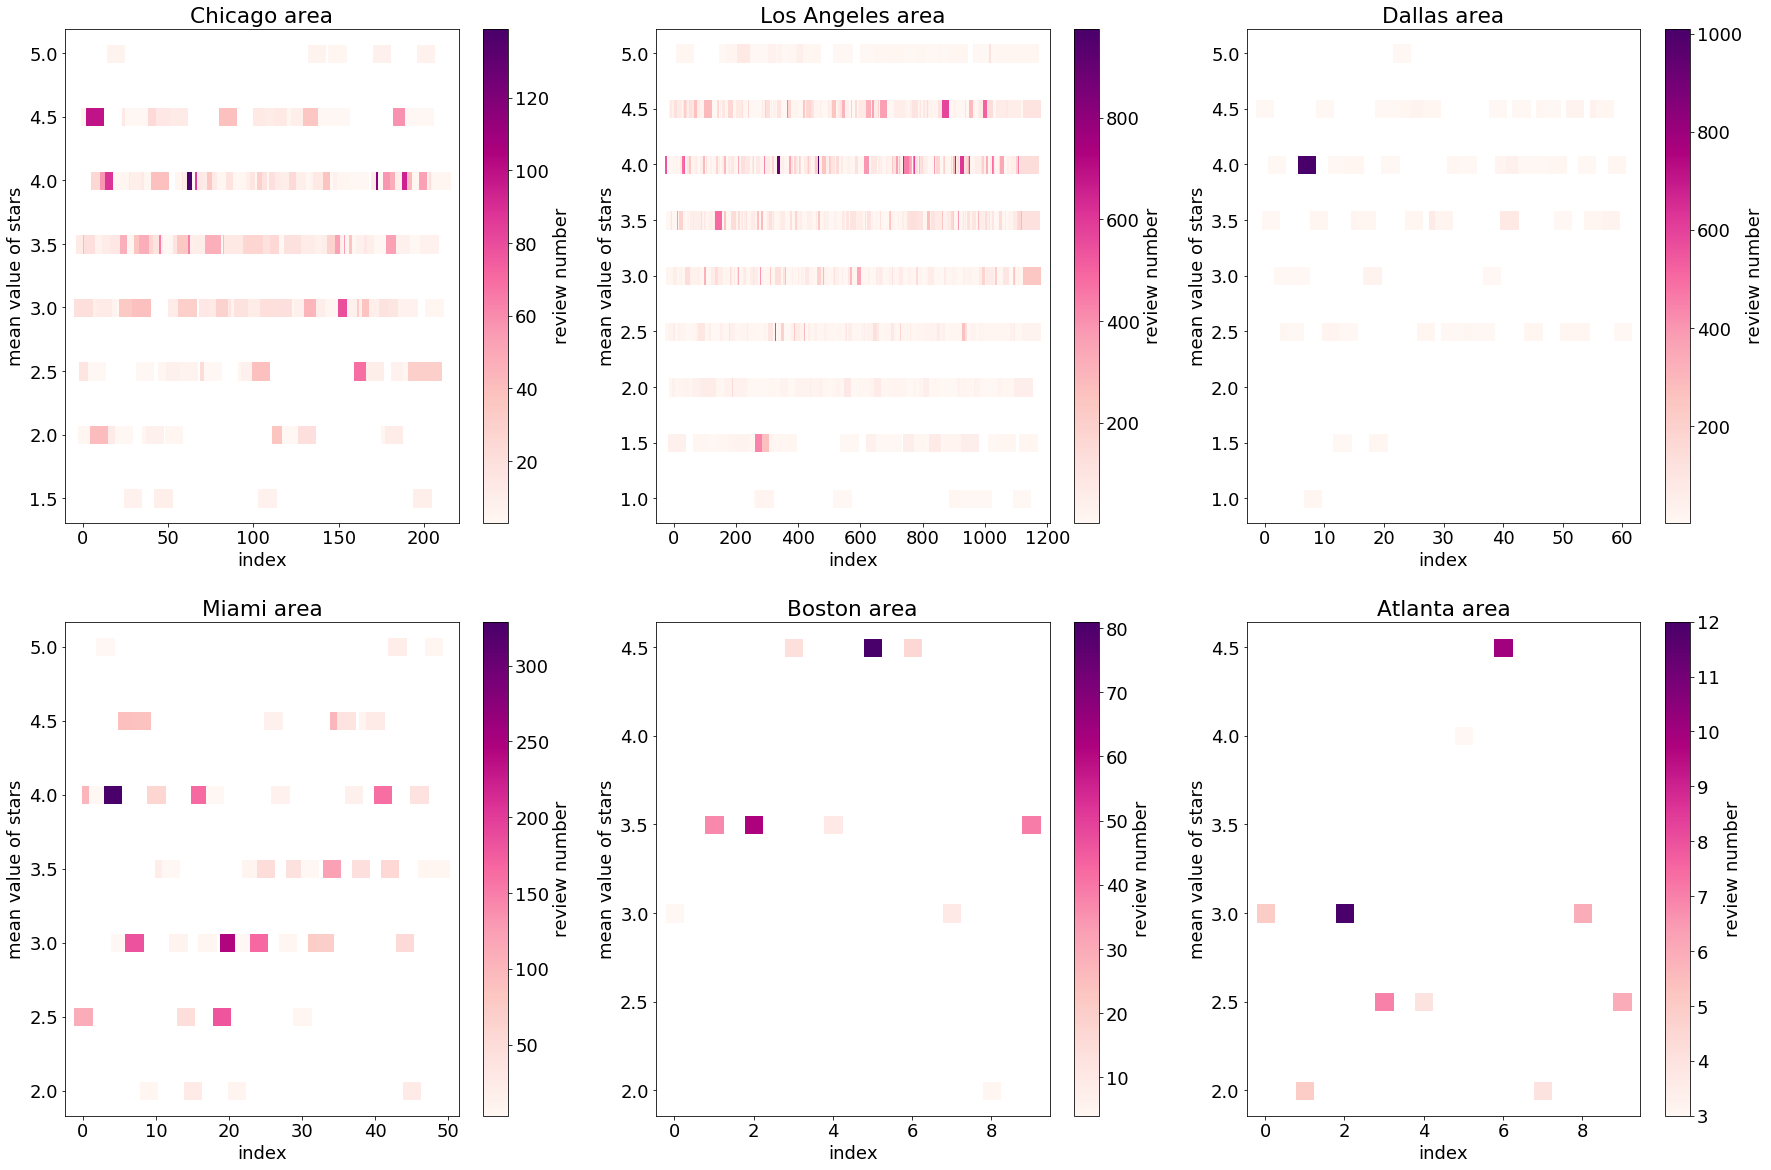

In [19]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0
fig = plt.figure(figsize=(30,20))
Scatter(chicago,id1, 1,"Chicago" )
Scatter(la,id2,2,"Los Angeles")
Scatter(dallas, id3, 3, "Dallas")
Scatter(miami, id4, 4, "Miami")
Scatter(boston, id5, 5,"Boston")
Scatter(atlanta, id6, 6, "Atlanta")

Text(0.5, 1.0, 'Donut graph of mean star value of six metropolitan areas')

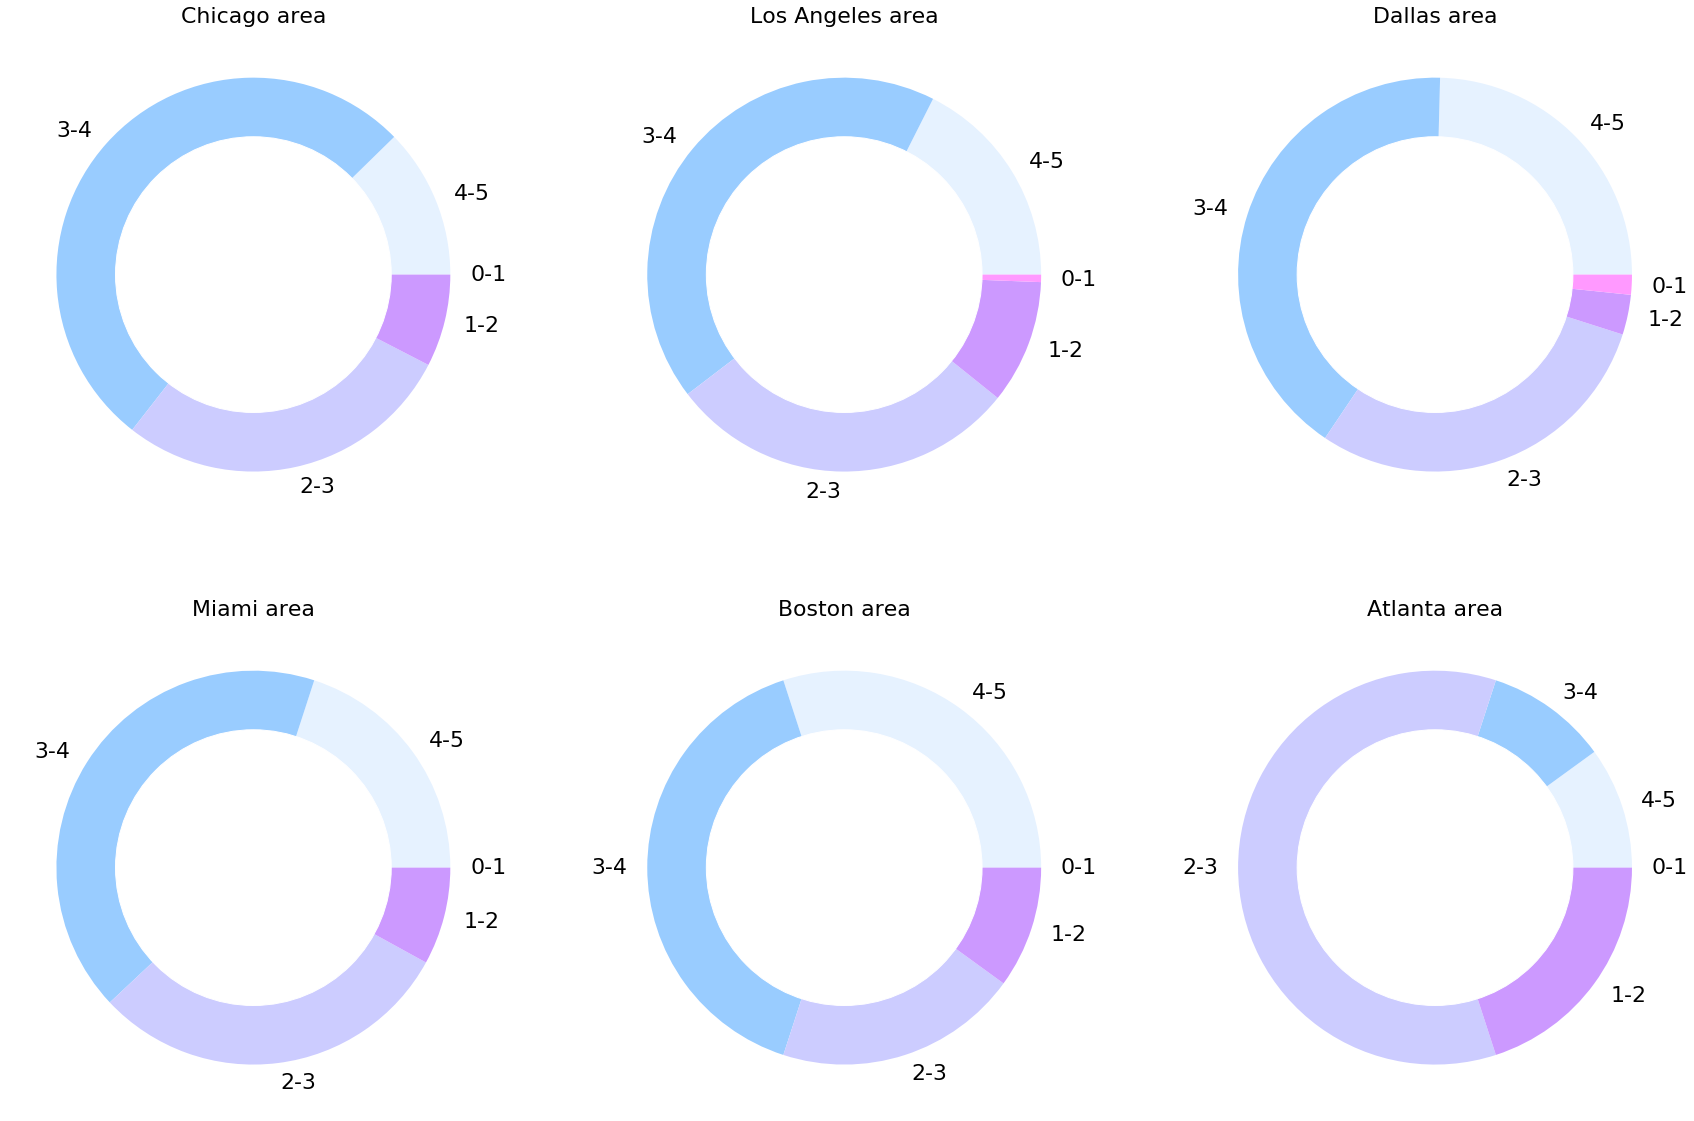

In [20]:
mpl.rcParams['font.size'] = 22.0
fig1, ax1 = plt.subplots()
fig1.set_size_inches([30,20])
Donut(chicago,1, "Chicago")
Donut(la, 2, "Los Angeles")
Donut(dallas, 3, "Dallas")
Donut(miami, 4, "Miami")
Donut(boston, 5, "Boston")
Donut(atlanta, 6, "Atlanta")
ax1.set_title("Donut graph of mean star value of six metropolitan areas")

In [21]:
def Calculate(business_star_ch):
    group1 = business_star_ch['stars_x'].apply(lambda x: x>4 and x<=5)
    group2 = business_star_ch['stars_x'].apply(lambda x: x>3 and x<=4)
    group3 = business_star_ch['stars_x'].apply(lambda x: x>2 and x<=3)
    group4 = business_star_ch['stars_x'].apply(lambda x: x>1 and x<=2)
    group5 = business_star_ch['stars_x'].apply(lambda x: x>=0 and x<=1)
    s1 = group1[group1 == True].size
    s2 = group2[group2 == True].size
    s3 = group3[group3 == True].size
    s4 = group4[group4 == True].size
    s5 = group5[group5 == True].size
    s = [s1, s2, s3, s4, s5]
    return s

s_c = Calculate(chicago)
s_l  = Calculate(la)
s_m = Calculate(miami) 
s_d = Calculate(dallas)
s_a = Calculate(atlanta)
s_b = Calculate(boston)

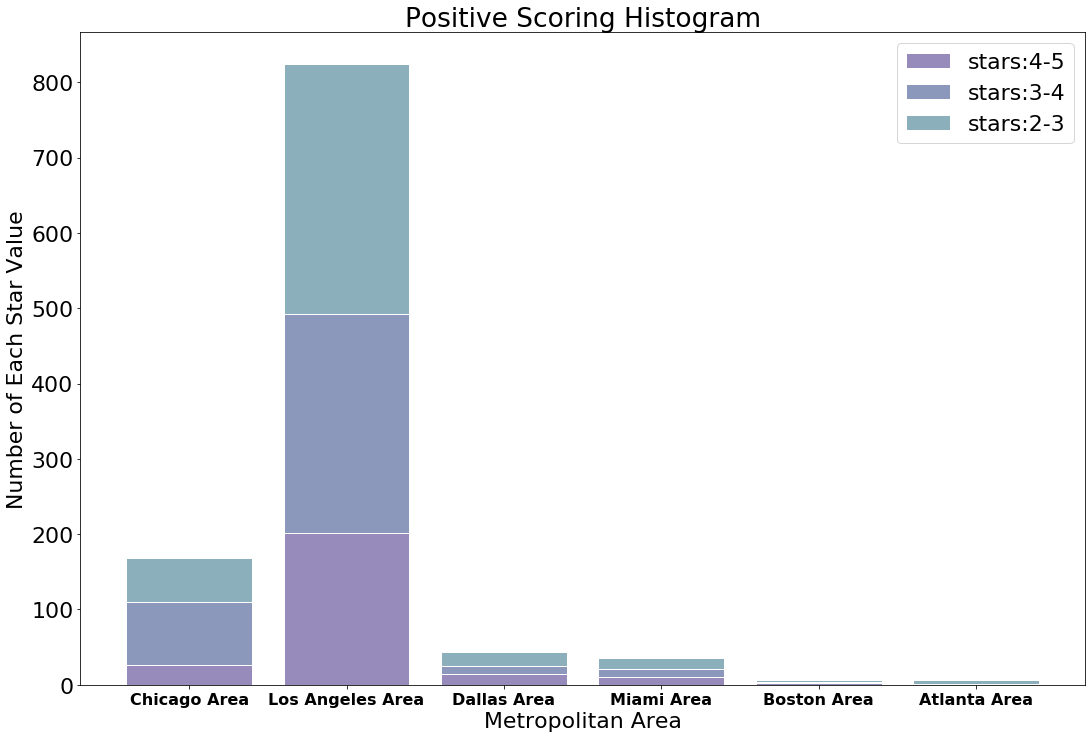

In [22]:
# star3-5 setted as a group; star0-2 setted as a group
fig = plt.gcf()
fig.set_size_inches(18, 12)
r = [0,1,2,3,4,5]
names = ['Chicago Area', 'Los Angeles Area', 'Dallas Area', 'Miami Area', 'Boston Area', 'Atlanta Area']
barWidth = 0.8
bars0 = [s_c[0], s_l[0], s_d[0], s_m[0], s_b[0], s_a[0]]
bars1 = [s_c[1], s_l[1], s_d[1], s_m[1], s_b[1], s_a[1]]
bars2 = [s_c[2], s_l[2], s_d[2], s_m[2], s_b[2], s_a[2]]
bars = np.add(bars0, bars1).tolist()
# Create brown bars
p1 = plt.bar(r, bars0, color='#968bbb', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(r, bars1, bottom=bars0, color='#8b98bb', edgecolor='white', width=barWidth)
# Create green bars (top)
p3 = plt.bar(r, bars2, bottom=bars1, color='#8bb0bb', edgecolor='white', width=barWidth)
# Custom X axis
plt.xticks(r, names, fontweight='bold', fontsize=16)
plt.xlabel("Metropolitan Area")
plt.ylabel("Number of Each Star Value")
plt.title("Positive Scoring Histogram")
plt.legend((p1[0],p2[0],p3[0]),('stars:4-5','stars:3-4','stars:2-3'))

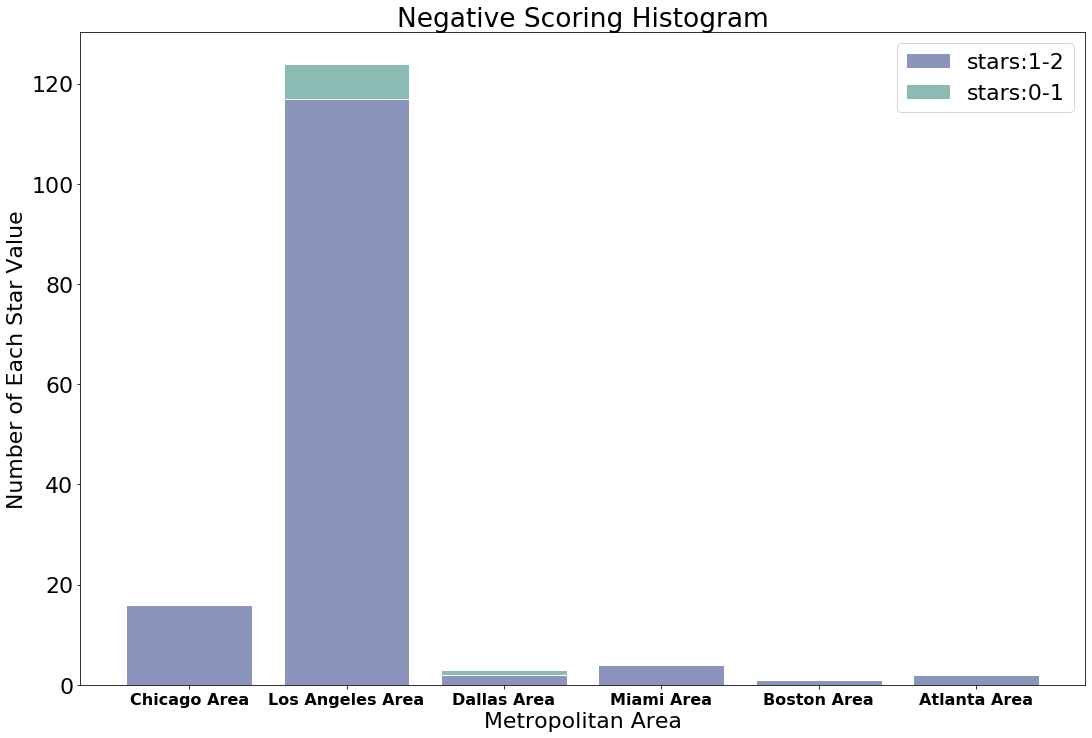

In [23]:
# star0-2 setted as a group; star0-2 setted as a group
fig = plt.gcf()
fig.set_size_inches(18, 12)
r = [0,1,2,3,4,5]
names = ['Chicago Area', 'Los Angeles Area', 'Dallas Area', 'Miami Area', 'Boston Area', 'Atlanta Area']
barWidth = 0.8
bars3 = [s_c[3], s_l[3], s_d[3], s_m[3], s_b[3], s_a[3]]
bars4 = [s_c[4], s_l[4], s_d[4], s_m[4], s_b[4], s_a[4]]
bars = np.add(bars0, bars1).tolist()
p3 = plt.bar(r, bars3, color='#8b94bb', edgecolor='white', width=barWidth)
p4 = plt.bar(r, bars4, bottom=bars3, color='#8bbbb2', edgecolor='white', width=barWidth)
plt.xticks(r, names, fontweight='bold', fontsize=16)
plt.xlabel("Metropolitan Area")
plt.ylabel("Number of Each Star Value")
plt.title("Negative Scoring Histogram")
plt.legend((p3[0],p4[0]),('stars:1-2','stars:0-1'))

### Statistical Testing

In [24]:
# Statistical Testing  
# use KS Test to judge if mean star value have the same distribution between Chicago area and LA area
# H0: Mean star value of Chicago and LA follows the same distribution
from scipy import stats
stats.ks_2samp(chicago.stars_x.values, la.stars_x.values)
# 0.3816>0.1, thus not follow the same distribution

Ks_2sampResult(statistic=0.06735951840764881, pvalue=0.3816261456544882)

### Text Extraction in Reviews

In [25]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/yujinxie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yujinxie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data_frames = [df_chicago, df_LA, df_Dallas, df_Miami, df_BS, df_pha]
dfs = pd.concat(data_frames)

In [27]:
reviews = dfs[['text', 'metropolitan area']]
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = text.strip()
    return text
reviews['text'] = reviews.text.apply(lambda x: clean_text(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
reviews

text metropolitan area
0   we had the hot n ready supreme and it was as a...           Chicago
1   love little ceasers regardless of the location...           Chicago
2   i visit this location fairly regularly a weekl...           Chicago
3   i love this place first it is around the corne...           Chicago
4   i really like this place we have been here on ...           Chicago
5   they just cancelled our valentines reservation...           Chicago
6   i experienced two opposites when visiting edwa...           Chicago
7   best restaurant in aurora we dine there often ...           Chicago
8   made a reservation for valentine is day on jan...           Chicago
9   ok this is an update to my original review wen...           Chicago
10  i really really want to love this place it is ...           Chicago
11  this is at best passable hotel dining room foo...           Chicago
12  had the special last night oz rib eye with gre...           Chicago
13  a very welcome to the choices in aurora first ...           Chicago
14  the food was good i enjoyed our dinner there i...           Chicago
15  just ok honestly the highlight of the meal was...           Chicago
16  i have to admit that i was a little surprised ...           Chicago
17  amazing grilled cheese and great gourmet items...           Chicago
18  first you will notice there is nobody eating i...           Chicago
19  soooo im disgusted by the way i revieved my dr...           Chicago
20  just moved to the area and trying the local pi...           Chicago
21  excellent food great service friendly staff we...           Chicago
22  i have ordered a single large pepperoni pizza ...           Chicago
23  great pizza and very friendly service we have ...           Chicago
24  i am surprised this place does not get better ...           Chicago
25  the best pizza in town pick up or sit in nice ...           Chicago
26  nothing too fancy just a great little neighbor...           Chicago
27  was here with a party of  recently and we all ...           Chicago
28  great ny style pizza my family and i were out ...           Chicago
29  very nice little italian place i usually only ...           Chicago
..                                                ...               ...
32  terrible rude people will never go there again...           Atlanta
33  so this was the first pizza place i tried when...           Atlanta
34  we love pizza in fact my son and i probably ea...           Atlanta
35  best home pizza delivery in every way always g...           Atlanta
36  this used to be the go to pizza for me since t...           Atlanta
37  too many flies at this location otherwise i li...           Atlanta
38  friendly staff with fast service just like any...           Atlanta
39  good starbucks but poor location as very far f...           Atlanta
40  this is the closest starbucks to my house it i...           Atlanta
41  cannot say anything bad about this starbucks e...           Atlanta
42  a small starbucks close to home the staff is f...           Atlanta
43  yikes i did not enjoy this over breaded too mu...           Atlanta
44  i have been to this place a few times and ever...           Atlanta
45  got  specials recieved  pieces missing  pieces...           Atlanta
46  i did a lot better not going here when i did n...           Atlanta
47  ordered off skip the dishes food came fast and...           Atlanta
48  just like any other popeye is restaurant girls...           Atlanta
49  if the idea of eating at a truck stop excites ...           Atlanta
50  i am a regular here lots of truck parking and ...           Atlanta
51  clean atmosphere looks newly renovated friendl...           Atlanta
52  an amazing place to sit relax and have great c...           Atlanta
53  incredible food and friendly environment great...           Atlanta
54  my wife had her baby shower here so they close...           Atlanta
55  went there recently and i gotta say i was pret...           Atlanta
56  i just did no

In [29]:
# Word Segmentation
reviews['tokenized_sents'] = reviews['text'].apply(word_tokenize)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# Remove stopwords in review text
stop_words = set(stopwords.words('English'))
print(stop_words)
reviews['meaningful_words'] = reviews.tokenized_sents.apply(lambda x:[item for item in x if item not in stop_words])

{'their', 'why', 'aren', 'nor', 'out', 'at', 'shan', 'himself', 'on', "needn't", 'be', 'her', 'wasn', 'now', 'for', 'while', 'because', 'what', 'him', 'between', "she's", 't', "hasn't", 'y', 'but', 'them', "mustn't", 'ourselves', 'he', 'only', 'just', 'once', 'whom', 'very', 'myself', 'shouldn', 'having', 'through', "mightn't", 'and', 'against', 'been', 'yours', 'as', 'should', 'our', 'its', 'each', 'then', 'into', 'a', 'is', 'do', 'too', "you'd", 'theirs', 'needn', 'the', "aren't", 'again', 'few', "wouldn't", 'yourselves', 'doing', 'below', "should've", 'doesn', 'same', 'under', "you'll", 'o', 'can', 'so', 'above', 'which', 'by', 'up', 'd', 've', 'or', 'couldn', "wasn't", 'hadn', 'both', 'before', 'herself', 'hers', 'that', 'was', 'how', "don't", 'i', 'further', 'most', "doesn't", 'being', 'didn', 'me', 'she', 'has', 're', 'own', 'are', 'you', 'here', "shan't", 'until', 'those', 'from', 'no', 'during', 'were', 'we', "won't", 'ours', 'will', 'haven', "didn't", 'ma', 'where', 'mightn', 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
reviews

text metropolitan area  \
0   we had the hot n ready supreme and it was as a...           Chicago   
1   love little ceasers regardless of the location...           Chicago   
2   i visit this location fairly regularly a weekl...           Chicago   
3   i love this place first it is around the corne...           Chicago   
4   i really like this place we have been here on ...           Chicago   
5   they just cancelled our valentines reservation...           Chicago   
6   i experienced two opposites when visiting edwa...           Chicago   
7   best restaurant in aurora we dine there often ...           Chicago   
8   made a reservation for valentine is day on jan...           Chicago   
9   ok this is an update to my original review wen...           Chicago   
10  i really really want to love this place it is ...           Chicago   
11  this is at best passable hotel dining room foo...           Chicago   
12  had the special last night oz rib eye with gre...           Chicago   
13  a very welcome to the choices in aurora first ...           Chicago   
14  the food was good i enjoyed our dinner there i...           Chicago   
15  just ok honestly the highlight of the meal was...           Chicago   
16  i have to admit that i was a little surprised ...           Chicago   
17  amazing grilled cheese and great gourmet items...           Chicago   
18  first you will notice there is nobody eating i...           Chicago   
19  soooo im disgusted by the way i revieved my dr...           Chicago   
20  just moved to the area and trying the local pi...           Chicago   
21  excellent food great service friendly staff we...           Chicago   
22  i have ordered a single large pepperoni pizza ...           Chicago   
23  great pizza and very friendly service we have ...           Chicago   
24  i am surprised this place does not get better ...           Chicago   
25  the best pizza in town pick up or sit in nice ...           Chicago   
26  nothing too fancy just a great little neighbor...           Chicago   
27  was here with a party of  recently and we all ...           Chicago   
28  great ny style pizza my family and i were out ...           Chicago   
29  very nice little italian place i usually only ...           Chicago   
..                                                ...               ...   
32  terrible rude people will never go there again...           Atlanta   
33  so this was the first pizza place i tried when...           Atlanta   
34  we love pizza in fact my son and i probably ea...           Atlanta   
35  best home pizza delivery in every way always g...           Atlanta   
36  this used to be the go to pizza for me since t...           Atlanta   
37  too many flies at this location otherwise i li...           Atlanta   
38  friendly staff with fast service just like any...           Atlanta   
39  good starbucks but poor location as very far f...           Atlanta   
40  this is the closest starbucks to my house it i...           Atlanta   
41  cannot say anything bad about this starbucks e...           Atlanta   
42  a small starbucks close to home the staff is f...           Atlanta   
43  yikes i did not enjoy this over breaded too mu...           Atlanta   
44  i have been to this place a few times and ever...           Atlanta   
45  got  specials recieved  pieces missing  pieces...           Atlanta   
46  i did a lot better not going here when i did n...           Atlanta   
47  ordered off skip the dishes food came fast and...           Atlanta   
48  just like any other popeye is restaurant girls...           Atlanta   
49  if the idea of eating at a truck stop excites ...           Atlanta   
50  i am a regular here lots of truck parking and ...           Atlanta   
51  clean atmosphere looks newly renovated friendl...           Atlanta   
52  an amazing place to sit relax and have great c...           Atlanta   
53  incredible food and friendly environment great...           Atlanta   

### Chicago

In [32]:
# For Chicago Area
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz1 = vectorizer.fit_transform(list(reviews[reviews['metropolitan area']=='Chicago']['meaningful_words'].map(lambda tokens: ' '.join(tokens))))
'''
vz is a tfidf matrix.
its number of rows is the total number of documents (descriptions)
its number of columns is the total number of unique terms (tokens) across the documents (descriptions)
x_dt = tfidf(t,d) where x_dt is the element at the index (d,t) in the matrix.
'''
# create a dictionary mapping the tokens to their tfidf values
tfidf1 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf1 = pd.DataFrame(columns=['tfidf1']).from_dict(dict(tfidf1), orient='index')
tfidf1.columns = ['tfidf1']

In [33]:
vz1.shape  # number of features (= 6369)

(4030, 6369)

Text(0.5, 1.0, 'Distribution Histogram of Tfidf Score in Chicago Area')

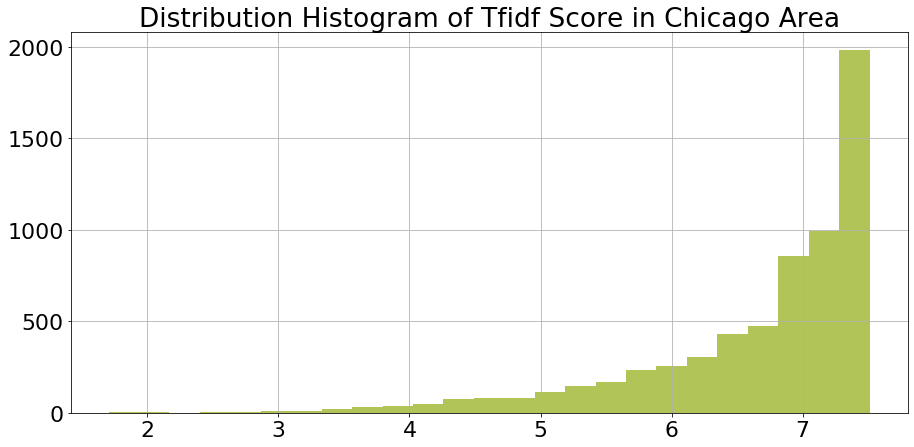

In [34]:
fig = plt.gcf()
tfidf1.tfidf1.hist(bins=25, figsize=(15,7), color='#b0c457')
plt.title('Distribution Histogram of Tfidf Score in Chicago Area')

In [35]:
tfidf1

tfidf1
ability               7.355860
able                  5.011310
able eat              7.510010
absolute              6.357331
absolutely            4.381789
absolutely amazing    7.104545
absolutely delicious  5.969565
absolutely horrible   7.355860
absolutely love       6.593720
absolutely loved      7.222328
ac                    7.510010
accent                7.510010
accept                6.529181
acceptable            7.104545
accepted              7.510010
access                6.999185
accessible            7.355860
accident              7.510010
accidentally          6.999185
accommodate           6.166276
accommodated          7.355860
accommodating         5.451622
accompaniment         7.510010
accompanying          7.355860
according             6.662712
accordingly           7.222328
accurate              7.222328
acknowledged          6.736820
act                   7.222328
acted                 7.355860
...                        ...
year ago              7.222328
year anniversary      7.510010
year old              5.934474
years                 4.214173
years ago             6.210727
yelling               6.736820
yellow                6.736820
yelp                  4.997705
yelp app              7.510010
yelp reviews          7.222328
yelpers               6.529181
yes                   5.011310
yesterday             5.969565
yo                    6.903874
yogurt                6.736820
yonge                 5.775409
yonge st              7.510010
yonge street          6.736820
yonge wellington      7.510010
york                  5.775409
york region           6.411398
young                 5.473128
young man             6.999185
younger               6.529181
yum                   5.746422
yummy                 4.647809
yummy food            7.222328
zero                  6.306037
zero stars            7.510010
zucchini              6.662712

[6369 rows x 1 columns]

In [36]:
from wordcloud import WordCloud

# Display the 50 tokens that have the lowest tfidf scores
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, background_color ='black',).generate(text)
    plt.figure(figsize=(25,25))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

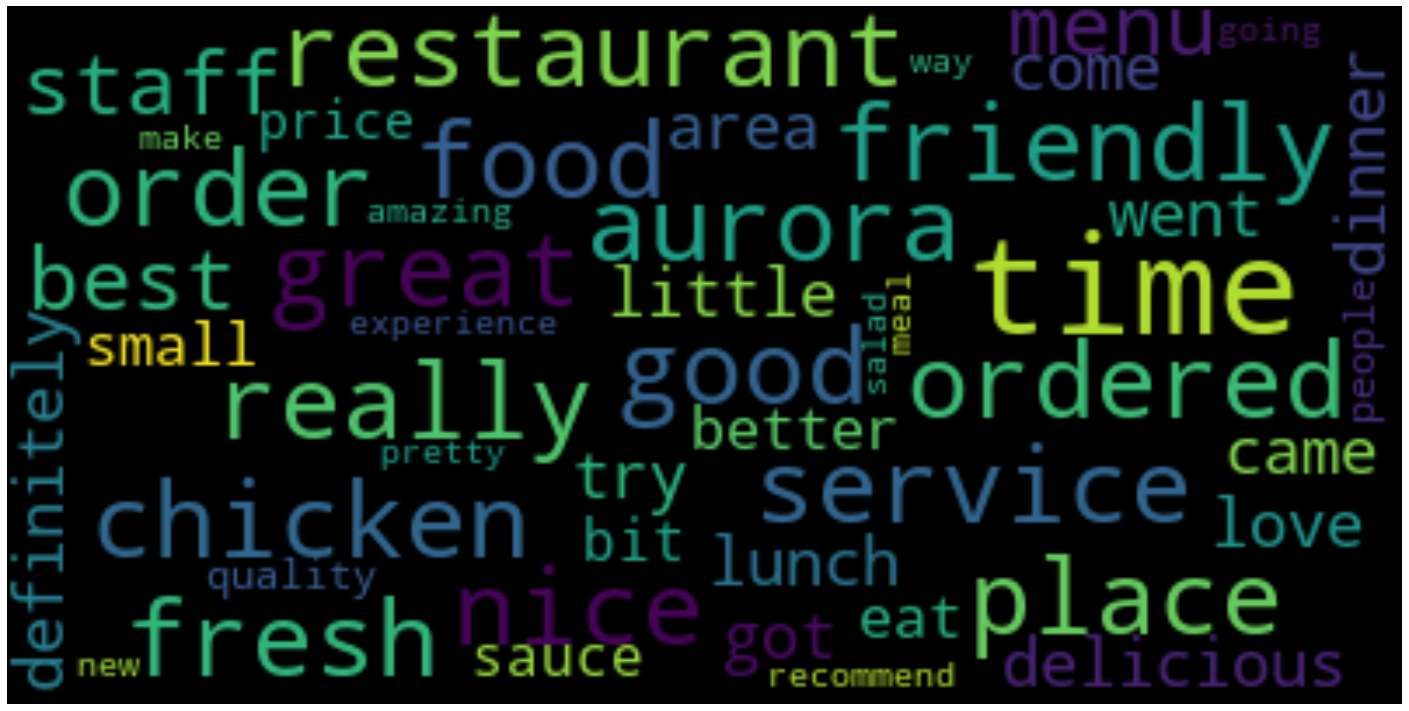

In [37]:
plot_word_cloud(tfidf1.sort_values(by=['tfidf1'], ascending=True).head(50))

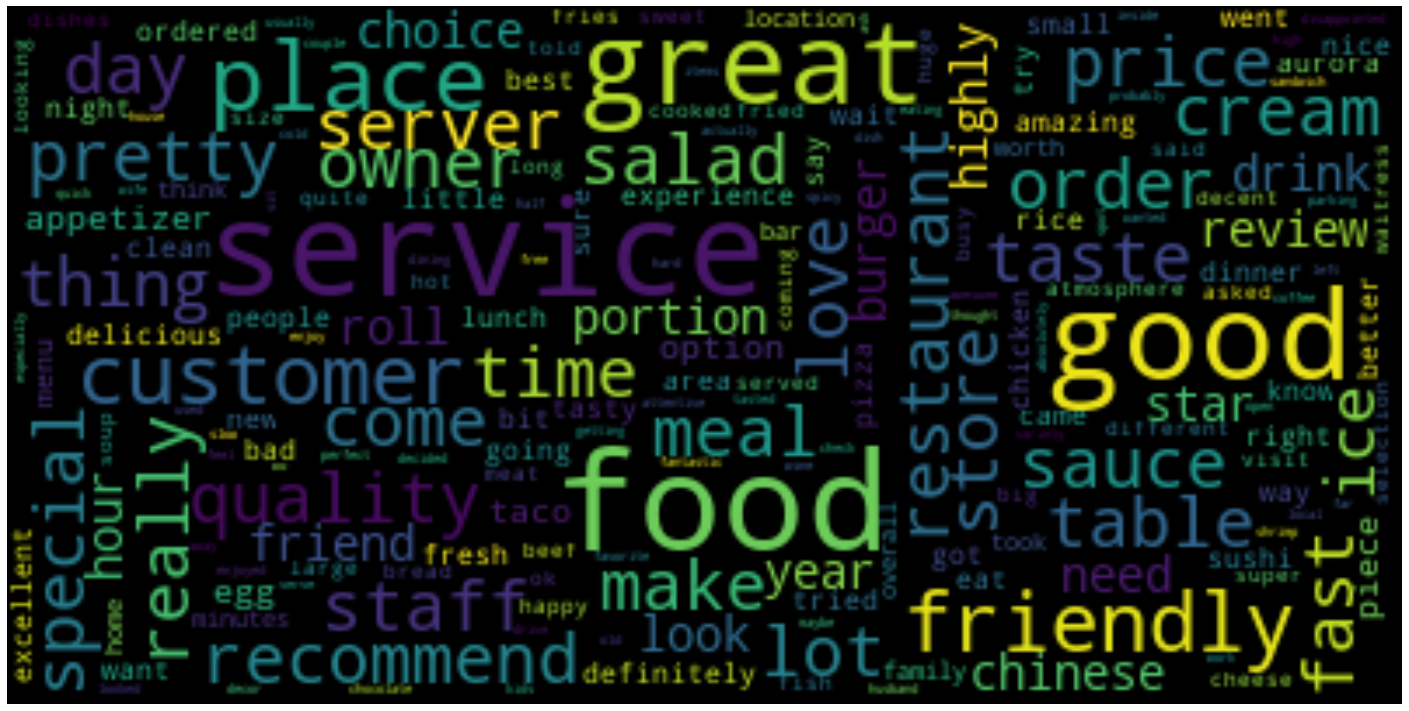

In [38]:
plot_word_cloud(tfidf1.sort_values(by=['tfidf1'], ascending=True).head(500))

### POS Tagging
We can see various kinds of word belonging to different lexical categories. Next step is to tag each word of a text with its word class, which will be beneficial to looking for food words.

In [39]:
# from nltk import word_tokenize, pos_tag, pos_tag_sents
# import nltk
# nltk.download('averaged_perceptron_tagger')
# texts = reviews['text'].tolist()
# reviews['POS'] = pos_tag_sents(reviews['text'].apply(word_tokenize).tolist())

In [40]:
# reviews["noun_count"] = reviews["POS"].apply(lambda x: [1 if item == "NN" or "NNP" or "NNS" else 0 for item in x])

### Text Classification

In [41]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 10, random_state=0).fit(vz)

In [42]:
# labels = kmeans.labels_
# reviews['labels'] = list(labels)

In [43]:
# Using the NLTK WordNet dictionary check if the word is noun and a food.
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def if_food(word):

    syns = wn.synsets(str(word), pos = wn.NOUN)

    for syn in syns:
        if 'food' in syn.lexname():
            return 1
        else: return 0

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yujinxie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
chicago_food = pd.DataFrame(tfidf1)# .index.values)
chicago_food['word'] = chicago_food.index.values

In [45]:
# chicago_food.rename(columns={0 :"word", 'tfidf1':'tfidf1'}, inplace=True)

In [46]:
chicago_food['score'] = chicago_food.word.apply(if_food)

In [47]:
chicago_food = chicago_food.reset_index(drop=True)

In [48]:
chi_food = chicago_food[chicago_food['score']==1][['word','tfidf1']]

In [49]:
chi_food.set_index('word', inplace=True)

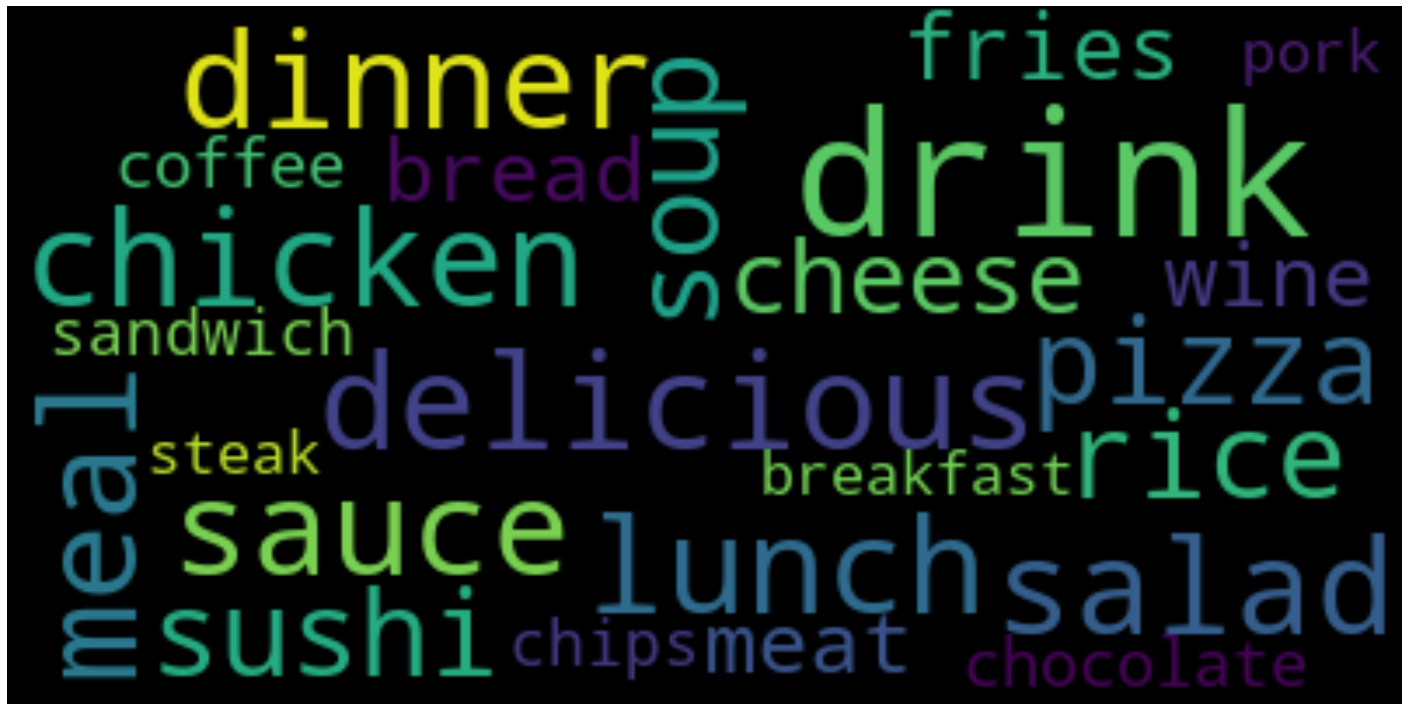

In [50]:
# Display the 50 tokens that have the lowest tfidf scores
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=50, background_color ='black',).generate(text)
    plt.figure(figsize=(25,25))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
plot_word_cloud(chi_food.sort_values(by=['tfidf1'], ascending=True).head(25))

In [103]:
print("chicago")
print(chi_food.sort_values(by=['tfidf1'], ascending=True).head(25))

chicago
             tfidf1
word               
chicken    2.857639
delicious  2.964944
lunch      3.149037
dinner     3.259137
sauce      3.374844
salad      3.415666
meal       3.502677
pizza      3.628446
sushi      3.631889
rice       3.645778
soup       3.741088
cheese     3.808708
fries      3.833710
bread      3.885669
meat       3.978760
drinks     4.076023
wine       4.103273
drink      4.220365
chocolate  4.284490
coffee     4.360127
sandwich   4.374516
chips      4.381789
breakfast  4.403930
pork       4.403930
steak      4.457583


### Los Angeles

In [51]:
# For Los Angeles Area
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz2 = vectorizer.fit_transform(list(reviews[reviews['metropolitan area']=='Los Angeles']['meaningful_words'].map(lambda tokens: ' '.join(tokens))))
'''
vz is a tfidf matrix.
its number of rows is the total number of documents (descriptions)
its number of columns is the total number of unique terms (tokens) across the documents (descriptions)
x_dt = tfidf(t,d) where x_dt is the element at the index (d,t) in the matrix.
'''
# create a dictionary mapping the tokens to their tfidf values
tfidf2 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf2 = pd.DataFrame(columns=['tfidf2']).from_dict(dict(tfidf2), orient='index')
tfidf2.columns = ['tfidf2']

In [52]:
vz2.shape   # 106087

(76162, 106087)

Text(0.5, 1.0, 'Distribution Histogram of Tfidf Score in Los Angeles Area')

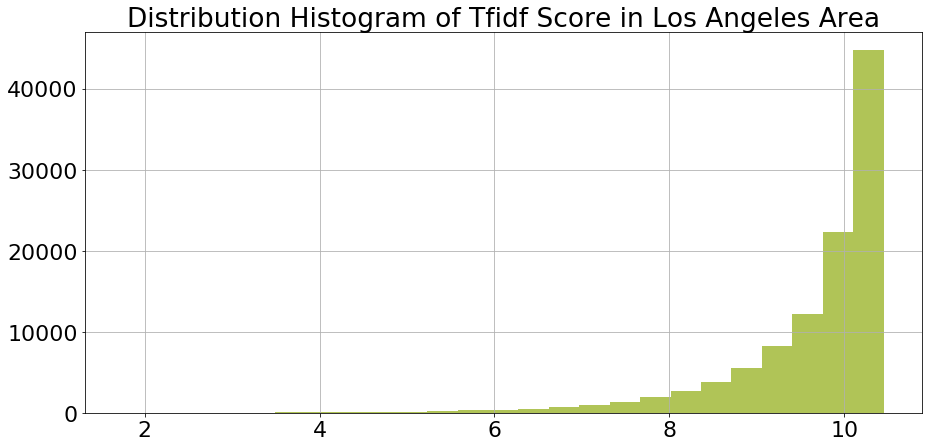

In [53]:
fig = plt.gcf()
tfidf2.tfidf2.hist(bins=25, figsize=(15,7), color='#b0c457')
plt.title('Distribution Histogram of Tfidf Score in Los Angeles Area')

In [54]:
tfidf2

tfidf2
aa                   8.502961
aa bowl              9.350259
aa bowls             9.468042
aaa                 10.161190
aaabar               9.938046
aaabar pools        10.448872
aaron                8.603045
aaron great         10.448872
aback                9.196109
abacus               8.714271
abacus inn           9.532581
abandon             10.448872
abandoned            8.944794
abbreviated         10.448872
abby                10.448872
abc                 10.043406
abd                 10.043406
abe                 10.043406
abide               10.448872
abides               8.629713
abiding             10.448872
abilities            9.938046
ability              7.763294
ability order       10.448872
able                 4.862247
able accommodate     8.839434
able add            10.294721
able afford         10.294721
able answer          9.601574
able bring           9.938046
...                       ...
zero tip            10.043406
zest                 9.350259
zesty                8.577069
zillion              9.938046
zin                 10.043406
zing                 8.603045
zingy               10.294721
zip                  8.873335
zip code            10.161190
zipp                10.294721
zipps                8.982535
zippy                9.938046
ziti                 8.129757
zoe                  9.842736
zoes                10.448872
zombie               9.296192
zombies              9.755724
zone                 8.050976
zoo                  9.532581
zoodles              9.938046
zucca               10.043406
zucca chips         10.043406
zucchini             6.957427
zucchini appetizer  10.294721
zucchini good       10.161190
zucchini mushrooms  10.448872
zucchini sticks     10.161190
zuchinni            10.043406
zupas                8.551752
zuppa               10.294721

[106087 rows x 1 columns]

In [55]:
la_food = pd.DataFrame(tfidf2)# .index.values)
la_food['word'] = la_food.index.values

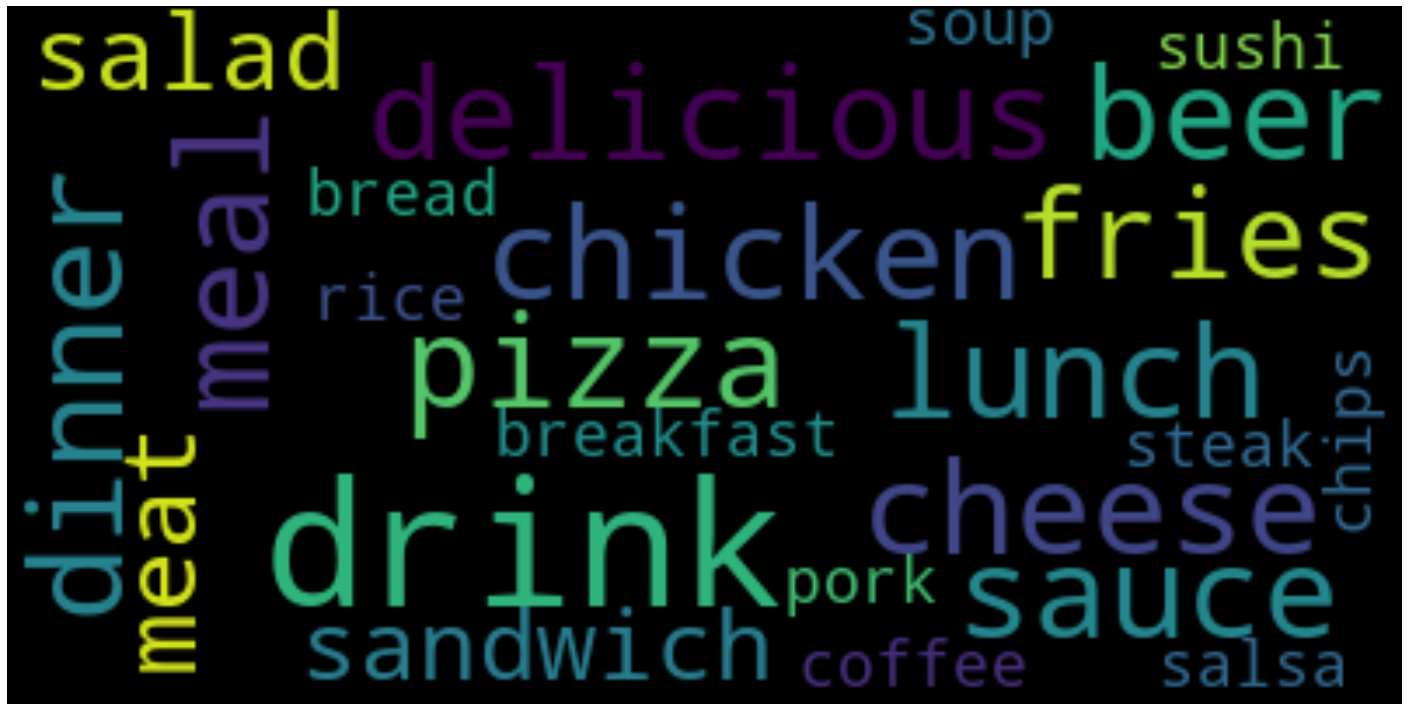

In [56]:
la_food['score'] = la_food.word.apply(if_food)
la_food = la_food.reset_index(drop=True)
la_food = la_food[la_food['score']==1][['word','tfidf2']]
la_food.set_index('word', inplace=True)
plot_word_cloud(la_food.sort_values(by=['tfidf2'], ascending=True).head(25))

In [99]:
print("la")
print(la_food.sort_values(by=['tfidf2'], ascending=True).head(25))

la
             tfidf2
word               
delicious  2.965346
chicken    3.164279
pizza      3.453258
cheese     3.455244
sauce      3.466937
drinks     3.602106
lunch      3.620160
meal       3.660275
dinner     3.759687
drink      3.761971
beer       3.780643
fries      3.829688
salad      3.847415
meat       3.903043
sandwich   4.070162
breakfast  4.096242
rice       4.128403
sushi      4.137439
coffee     4.153606
bread      4.160084
soup       4.323824
chips      4.355302
salsa      4.507385
steak      4.582876
pork       4.608230


### Dallas

In [57]:
# For Dallas Area
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz3 = vectorizer.fit_transform(list(reviews[reviews['metropolitan area']=='Dallas']['meaningful_words'].map(lambda tokens: ' '.join(tokens))))
'''
vz is a tfidf matrix.
its number of rows is the total number of documents (descriptions)
its number of columns is the total number of unique terms (tokens) across the documents (descriptions)
x_dt = tfidf(t,d) where x_dt is the element at the index (d,t) in the matrix.
'''
# create a dictionary mapping the tokens to their tfidf values
tfidf3 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf3 = pd.DataFrame(columns=['tfidf3']).from_dict(dict(tfidf3), orient='index')
tfidf3.columns = ['tfidf3']

In [58]:
vz3.shape   # 3394

(1761, 3394)

Text(0.5, 1.0, 'Distribution Histogram of Tfidf Score in Dallas Area')

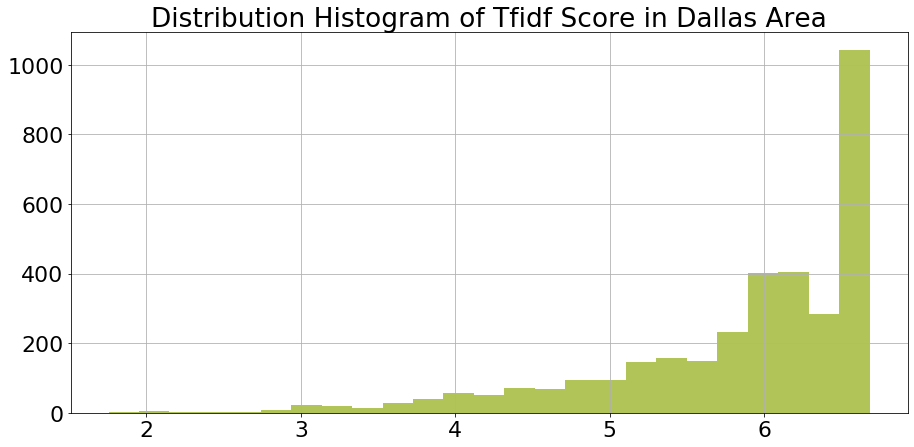

In [59]:
fig = plt.gcf()
tfidf3.tfidf3.hist(bins=25, figsize=(15,7), color='#b0c457')
plt.title('Distribution Histogram of Tfidf Score in Dallas Area')

In [60]:
dallas_food = pd.DataFrame(tfidf3)# .index.values)
dallas_food['word'] = dallas_food.index.values

In [61]:
dallas_food['score'] = dallas_food.word.apply(if_food)
dallas_food = dallas_food.reset_index(drop=True)

In [62]:
dallas_food

tfidf3                  word  score
0     4.582385                  able    NaN
1     6.682445              able eat    NaN
2     5.529766              absolute    0.0
3     6.394763     absolute favorite    NaN
4     4.104757            absolutely    NaN
5     6.528295    absolutely amazing    NaN
6     6.276980  absolutely delicious    NaN
7     6.171620       absolutely love    NaN
8     6.528295      absolutely loved    NaN
9     6.682445  absolutely wonderful    NaN
10    6.682445                accept    NaN
11    5.909255                access    0.0
12    6.276980           accommodate    NaN
13    5.701616         accommodating    NaN
14    6.528295           accompanied    NaN
15    6.276980               account    0.0
16    6.682445              accurate    NaN
17    6.528295           acknowledge    NaN
18    6.682445                   act    0.0
19    5.766155                actual    NaN
20    4.269512              actually    NaN
21    6.528295                  adam    0.0
22    5.040218                   add    0.0
23    5.583833                 added    NaN
24    6.171620              addition    0.0
25    6.276980            additional    NaN
26    6.171620                 admit    NaN
27    6.682445                 adult    0.0
28    6.171620                adults    0.0
29    6.076310               advance    0.0
...        ...                   ...    ...
3364  6.394763                  wrap    0.0
3365  3.561550               wrapped    NaN
3366  4.760633         wrapped bacon    NaN
3367  4.667542       wrapped chicken    NaN
3368  4.645563         wrapped filet    NaN
3369  6.394763        wrapped fillet    NaN
3370  6.528295                 wraps    0.0
3371  5.529766                 write    NaN
3372  6.076310               writing    0.0
3373  6.276980               written    NaN
3374  4.431154                 wrong    0.0
3375  6.682445                  wynn    NaN
3376  6.276980                    ya    NaN
3377  5.529766                  yeah    NaN
3378  4.299818                  year    0.0
3379  6.394763      year anniversary    NaN
3380  5.909255              year old    NaN
3381  4.008297                 years    0.0
3382  6.171620             years ago    NaN
3383  6.682445            years good    NaN
3384  5.008469                  yelp    0.0
3385  6.528295          yelp reviews    NaN
3386  6.528295               yelpers    NaN
3387  4.284550                   yes    0.0
3388  5.989298             yesterday    0.0
3389  5.478473                 young    0.0
3390  5.142000                   yum    NaN
3391  4.379860                 yummy    NaN
3392  6.394763                  zero    0.0
3393  6.394763              zucchini    0.0

[3394 rows x 3 columns]

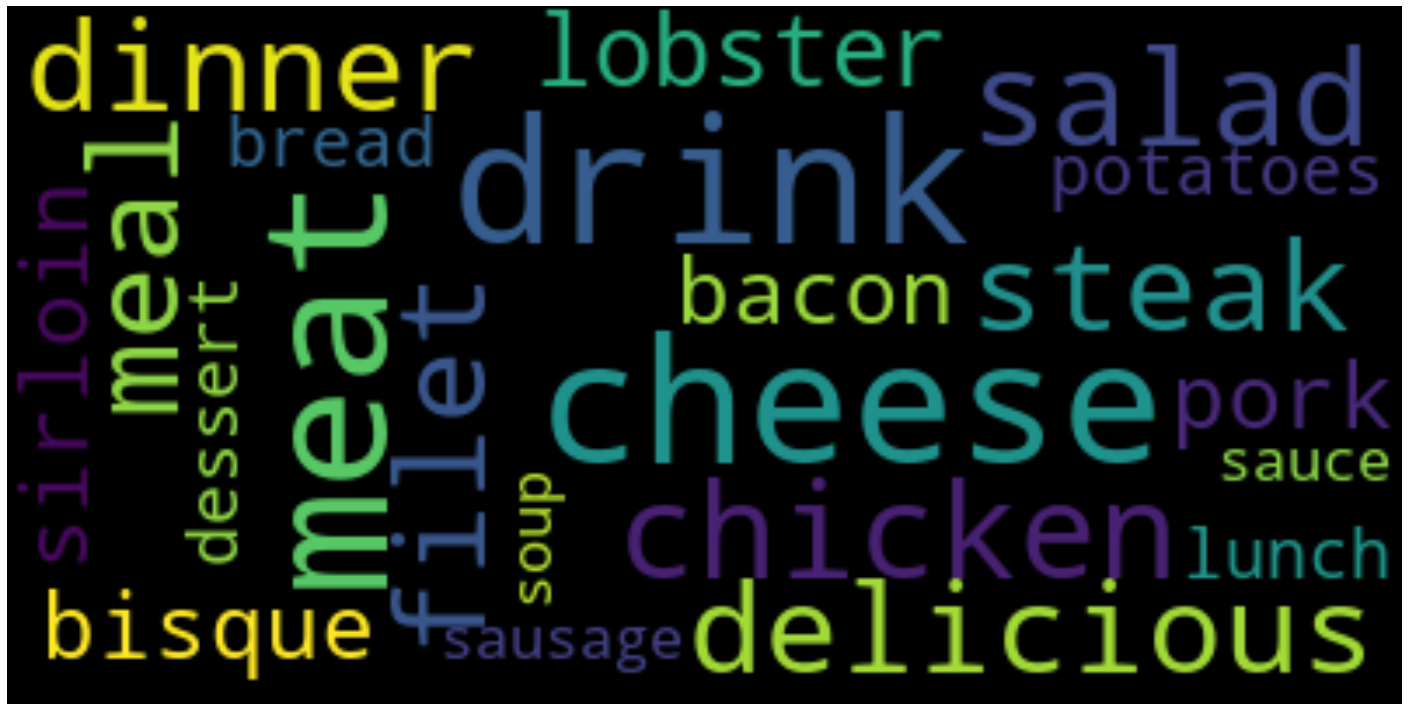

In [63]:
dallas_food = dallas_food[dallas_food['score']==1][['word','tfidf3']]
dallas_food.set_index('word', inplace=True)
plot_word_cloud(dallas_food.sort_values(by=['tfidf3'], ascending=True).head(25))

In [98]:
print("dallas")
print(dallas_food.sort_values(by=['tfidf3'], ascending=True).head(25))

dallas
             tfidf3
word               
meat       2.001859
salad      2.052583
meats      2.520961
chicken    2.740864
delicious  2.977037
steak      3.040483
dinner     3.053670
meal       3.175887
filet      3.175887
cheese     3.201205
lobster    3.227181
bisque     3.253849
bacon      3.320913
pork       3.437252
sirloin    3.497471
drinks     3.532562
potatoes   3.583856
lunch      3.583856
dessert    3.637923
bread      3.645891
drink      3.952416
sausage    3.974395
cheeses    4.031554
soup       4.079756
sauce      4.254697


### Miami

In [64]:
# For Miami Area
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz4 = vectorizer.fit_transform(list(reviews[reviews['metropolitan area']=='Miami']['meaningful_words'].map(lambda tokens: ' '.join(tokens))))
'''
vz is a tfidf matrix.
its number of rows is the total number of documents (descriptions)
its number of columns is the total number of unique terms (tokens) across the documents (descriptions)
x_dt = tfidf(t,d) where x_dt is the element at the index (d,t) in the matrix.
'''
# create a dictionary mapping the tokens to their tfidf values
tfidf4 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf4 = pd.DataFrame(columns=['tfidf4']).from_dict(dict(tfidf4), orient='index')
tfidf4.columns = ['tfidf4']

In [65]:
vz4.shape  # 5575

(2897, 5575)

Text(0.5, 1.0, 'Distribution Histogram of Tfidf Score in Miami Area')

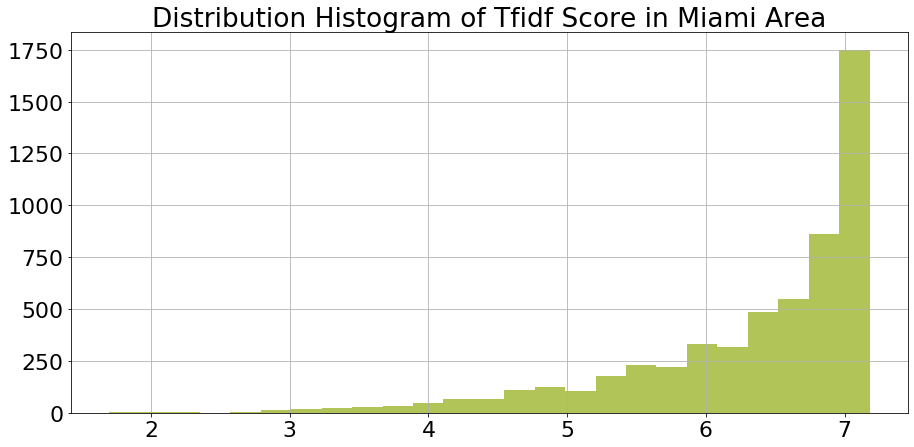

In [66]:
fig = plt.gcf()
tfidf4.tfidf4.hist(bins=25, figsize=(15,7), color='#b0c457')
plt.title('Distribution Histogram of Tfidf Score in Miami Area')

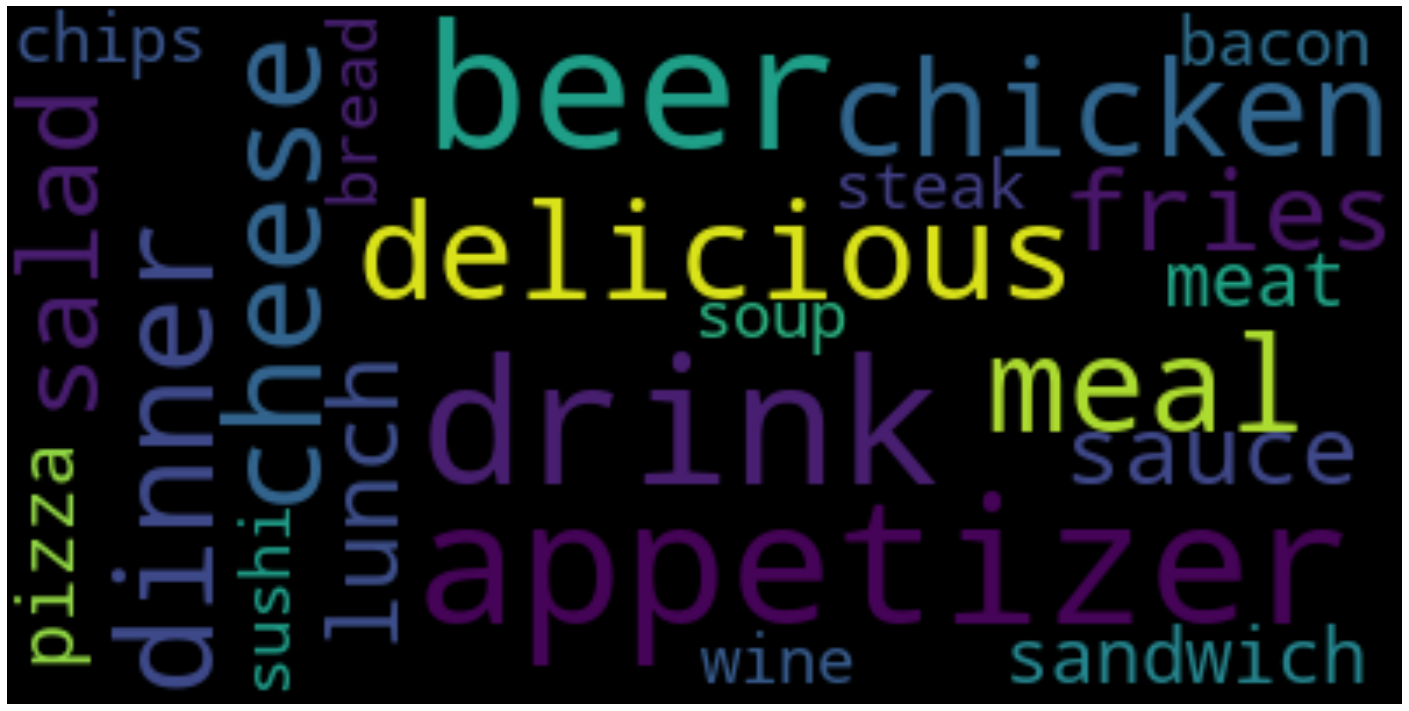

In [67]:
miami_food = pd.DataFrame(tfidf4)# .index.values)
miami_food['word'] = miami_food.index.values
miami_food['score'] = miami_food.word.apply(if_food)
miami_food = miami_food.reset_index(drop=True)
miami_food = miami_food[miami_food['score']==1][['word','tfidf4']]
miami_food.set_index('word', inplace=True)
plot_word_cloud(miami_food.sort_values(by=['tfidf4'], ascending=True).head(25))

In [97]:
print("miami")
print(miami_food.sort_values(by=['tfidf4'], ascending=True).head(25))

miami
              tfidf4
word                
beer        2.834049
delicious   2.922043
dinner      3.157646
drinks      3.157646
meal        3.194124
chicken     3.209725
cheese      3.222383
fries       3.228773
salad       3.403432
drink       3.546826
sauce       3.578149
beers       3.605800
lunch       3.663508
sandwich    3.730029
meat        3.847812
pizza       3.847812
chips       3.853782
appetizer   3.974564
wine        4.059121
bacon       4.088974
steak       4.119746
bread       4.175986
soup        4.218186
appetizers  4.308337
sushi       4.308337


### Boston

In [68]:
# For Boston Area
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz5 = vectorizer.fit_transform(list(reviews[reviews['metropolitan area']=='Boston']['meaningful_words'].map(lambda tokens: ' '.join(tokens))))
'''
vz is a tfidf matrix.
its number of rows is the total number of documents (descriptions)
its number of columns is the total number of unique terms (tokens) across the documents (descriptions)
x_dt = tfidf(t,d) where x_dt is the element at the index (d,t) in the matrix.
'''
# create a dictionary mapping the tokens to their tfidf values
tfidf5 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf5 = pd.DataFrame(columns=['tfidf5']).from_dict(dict(tfidf5), orient='index')
tfidf5.columns = ['tfidf5']

In [69]:
vz5.shape  # 556

(279, 556)

Text(0.5, 1.0, 'Distribution Histogram of Tfidf Score in Boston Area')

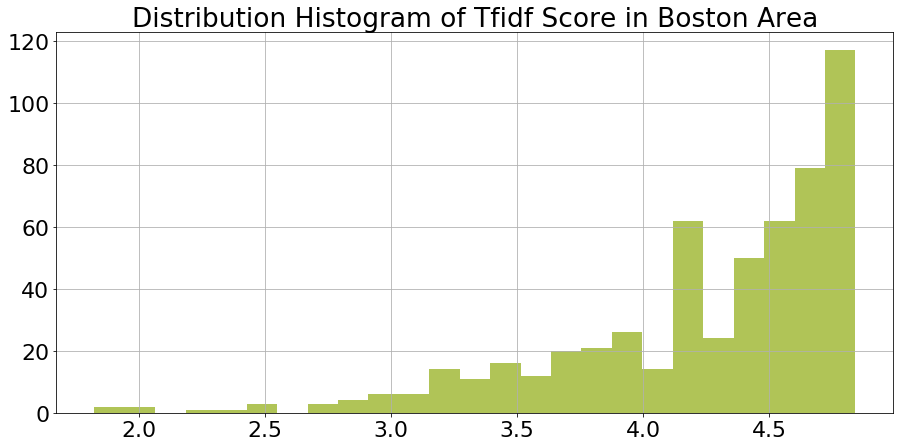

In [70]:
fig = plt.gcf()
tfidf5.tfidf5.hist(bins=25, figsize=(15,7), color='#b0c457')
plt.title('Distribution Histogram of Tfidf Score in Boston Area')

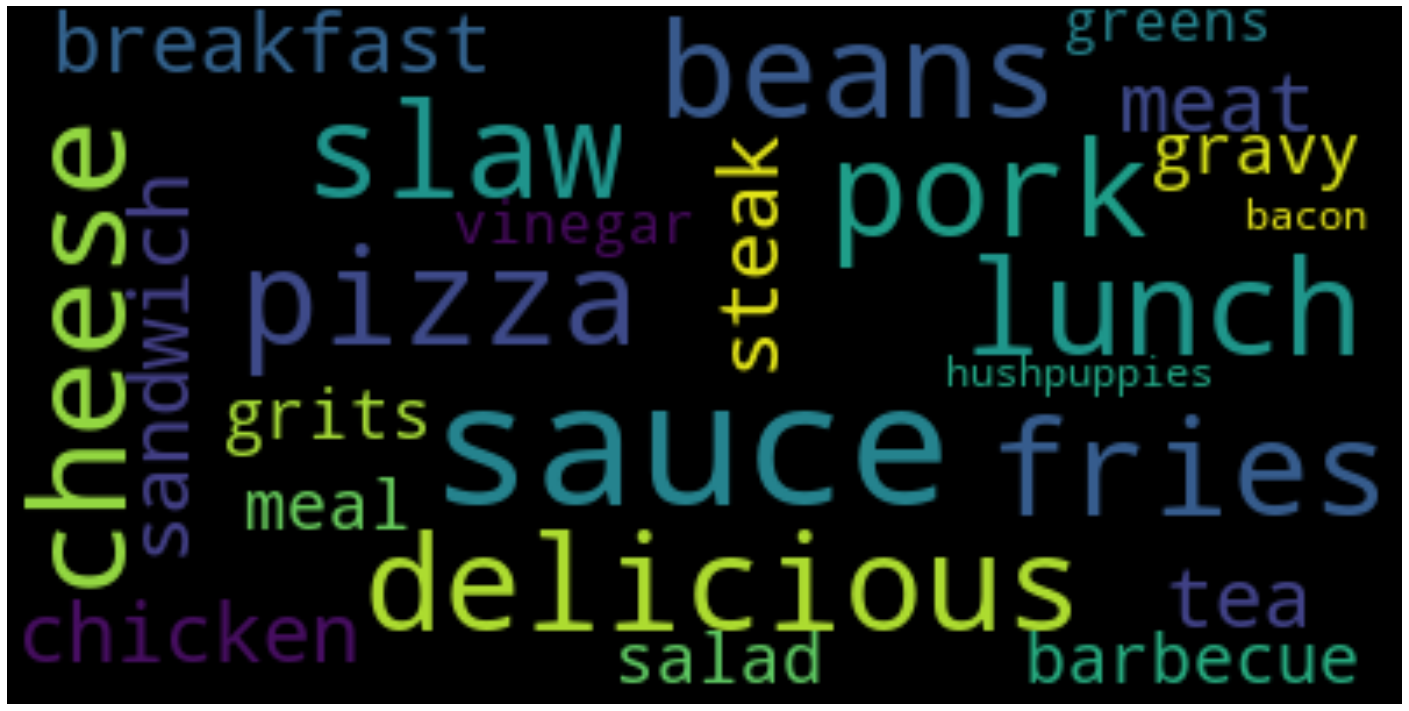

In [71]:
boston_food = pd.DataFrame(tfidf5)# .index.values)
boston_food['word'] = boston_food.index.values
boston_food['score'] = boston_food.word.apply(if_food)
boston_food = boston_food.reset_index(drop=True)
boston_food = boston_food[boston_food['score']==1][['word','tfidf5']]
boston_food.set_index('word', inplace=True)
plot_word_cloud(boston_food.sort_values(by=['tfidf5'], ascending=True).head(25))

In [101]:
print("boston")
print(boston_food.sort_values(by=['tfidf5'], ascending=True).head(25))

boston
               tfidf5
word                 
pizza        2.850600
sauce        2.897120
delicious    2.945910
pork         2.945910
fries        3.108429
slaw         3.200802
lunch        3.267494
cheese       3.302585
beans        3.376693
breakfast    3.456736
chicken      3.499295
sandwich     3.543747
tea          3.543747
steak        3.590267
meat         3.690351
barbecue     3.744418
meal         3.744418
gravy        3.995732
salad        3.995732
grits        3.995732
vinegar      3.995732
greens       4.149883
sauces       4.149883
hushpuppies  4.149883
bacon        4.149883


### Atlanta

In [91]:
# For Atlanta Area
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz6 = vectorizer.fit_transform(list(reviews[reviews['metropolitan area']=='Atlanta']['meaningful_words'].map(lambda tokens: ' '.join(tokens))))
'''
vz is a tfidf matrix.
its number of rows is the total number of documents (descriptions)
its number of columns is the total number of unique terms (tokens) across the documents (descriptions)
x_dt = tfidf(t,d) where x_dt is the element at the index (d,t) in the matrix.
'''
# create a dictionary mapping the tokens to their tfidf values
tfidf6 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf6 = pd.DataFrame(columns=['tfidf6']).from_dict(dict(tfidf6), orient='index')
tfidf6.columns = ['tfidf6']

In [92]:
vz6.shape # 70

(62, 70)

Text(0.5, 1.0, 'Distribution Histogram of Tfidf Score in Atlanta Area')

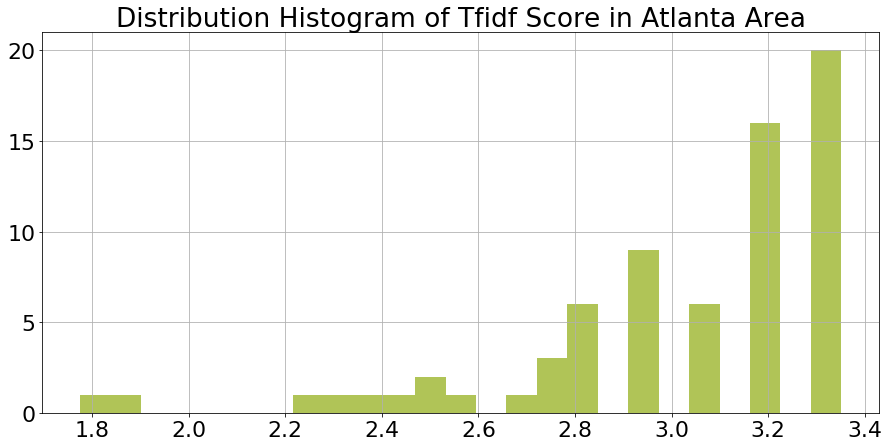

In [93]:
fig = plt.gcf()
tfidf6.tfidf6.hist(bins=25, figsize=(15,7), color='#b0c457')
plt.title('Distribution Histogram of Tfidf Score in Atlanta Area')

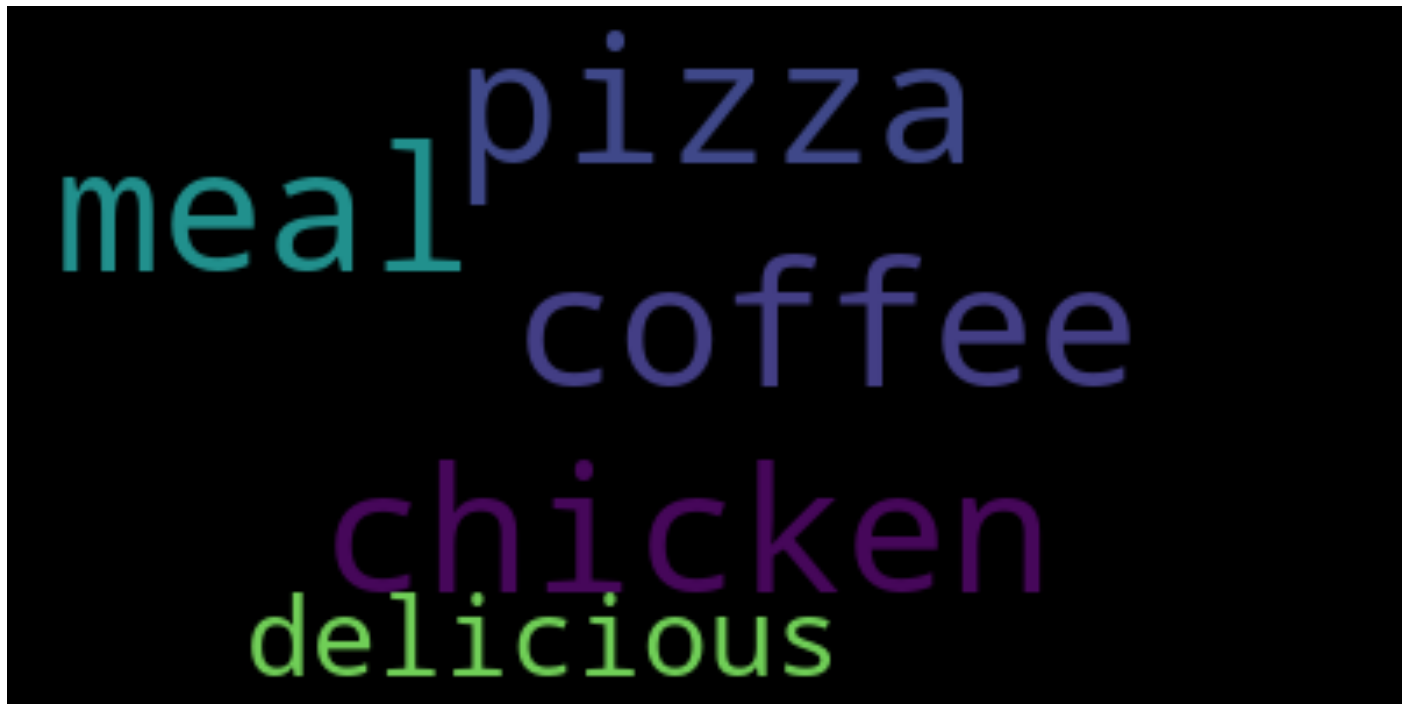

In [94]:
at_food = pd.DataFrame(tfidf6)# .index.values)
at_food['word'] = at_food.index.values
at_food['score'] = at_food.word.apply(if_food)
at_food = at_food.reset_index(drop=True)
at_food = at_food[at_food['score']==1][['word','tfidf6']]
at_food.set_index('word', inplace=True)
plot_word_cloud(at_food.sort_values(by=['tfidf6'], ascending=True).head(25))

In [102]:
print("atlanta")
print(at_food.sort_values(by=['tfidf6'], ascending=True).head(25))

atlanta
             tfidf6
word               
chicken    2.658228
coffee     2.945910
meal       2.945910
pizza      3.063693
delicious  3.351375


### Clustering

In [233]:
location = df_bn[df_bn['city'].isin(df_LA.city)][['longitude','latitude']].reset_index(drop='True')
location_ = location[location['longitude']<-110]
location_['label'] = kmeans.labels_
location_.to_excel("/Users/yujinxie/Desktop/loc.xlsx")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
location = df_bn[df_bn['city'].isin(df_LA.city)][['longitude','latitude']].reset_index(drop='True')
#location = df_bn[df_bn['city']=='Aurora'][['latitude','longitude']].reset_index(drop='True').values.tolist()
location = location[location['longitude']<-110].values.tolist()
len(location)

3543

In [179]:
location

[[-112.1885676, 33.6548146],
 [-112.186448429, 33.623871416],
 [-112.182662487, 33.567806315],
 [-112.1879866719, 33.6403899876],
 [-112.1612316, 33.5638269],
 [-112.1767706, 33.5400963],
 [-112.1868521, 33.6261448],
 [-112.1690823, 33.5449715],
 [-112.2026347, 33.664516],
 [-112.2312463447, 33.6384745917],
 [-112.185678981, 33.6524694411],
 [-112.192209, 33.567014],
 [-112.219354, 33.6386542],
 [-112.1843317, 33.5200766],
 [-112.1878351, 33.6621745],
 [-112.1703757684, 33.6118626623],
 [-112.202788, 33.524174],
 [-112.1883568, 33.662248],
 [-112.1769763, 33.5381734],
 [-112.2054822, 33.6670394],
 [-112.184843, 33.653451],
 [-112.225222, 33.6387943],
 [-112.1720275, 33.5381021],
 [-112.2021689, 33.5678171],
 [-112.1780901, 33.5526722],
 [-112.2026614, 33.7116771],
 [-112.1728283, 33.5690908],
 [-111.981167, 33.413484],
 [-112.1867997944, 33.6389921045],
 [-112.2264227, 33.6415373],
 [-112.2020149, 33.6655554],
 [-112.2004730166, 33.670048182],
 [-112.176624, 33.5380934],
 [-112.1525588

Why we set clustering? What KMeans to do? Kmeans divide clustering by distance.

In [192]:
rating = df_bn[df_bn['city'].isin(df_LA.city)][df_bn['longitude']<-110].stars.values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [200]:
def normData(dataset):
    dataset=np.array(dataset)
    mean=dataset.mean()
    std=dataset.std()
    dataset=(dataset-mean)/std
    return dataset

In [213]:
from sklearn.cluster import KMeans
import cluster
import numpy as np
import matplotlib.patches as mpatches
kmeans = KMeans(n_clusters=3, random_state=0).fit(location)

In [214]:
kmeans.labels_
#kmeans.cluster_centers

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [215]:
maxLables=cluster.attachLables(rating,kmeans.labels_,3)

avg:  [3.4277372262773724, 3.31433506044905, 3.118181818181818]
avg:  [3.11818182 3.31433506 3.42773723]
[3.11818182 3.31433506 3.42773723]
[2, 1, 0]


In [216]:
def showCluster(dataSet, k, centroids, clusterAssment, attachLables, path):
    dataSet = np.asarray(dataSet)
    labelsSet = ['1', '2', '3']#, '4']#, '5','6']
    colors = ['#ce8373', '#ce73be','#73bece']#, '#73ce83'] #, 'black','pink']
    # draw all samples
    for i in range(len(dataSet)):
        # markIndex = int(clusterAssment[i])
        plt.plot(dataSet[i, 0], dataSet[i, 1], color=colors[clusterAssment[i]], marker='o', markersize=10)
    patches = []
    # draw the centroids
    for i in range(k):
        fig = plt.gcf()
        fig.set_size_inches(18, 12)
        plt.plot(centroids[i, 0], centroids[i, 1], marker='D', color=colors[i], markersize=12)
        patches.append(mpatches.Patch(color=colors[i], label=labelsSet[attachLables[i]]))
    plt.title('K-Means clustering result in LA Metropolitan Area')
    plt.xlabel('longitude')  # latitude
    plt.ylabel('latitude')
    plt.legend(handles=patches)
    plt.savefig(path, bbox_inches='tight')
    plt.show()


In [228]:
def showCluster2(dataSet, k, clusterAssment,attachLables,path):
    dataSet=np.array(dataSet)
    labelsSet=['1','2','3']#,'4']#,'5']
    colors=['#ce8373', '#ce73be','#73bece']#,'black']
    # draw all samples
    for i in range(len(dataSet)):
        #markIndex = int(clusterAssment[i]) 
        plt.plot(dataSet[i, 0], dataSet[i, 1], color=colors[clusterAssment[i]], marker='o', markersize=10)
    patches=[]
    # draw the centroids
    for i in range(k):
        fig = plt.gcf()
        fig.set_size_inches(18, 12)
        patches.append ( mpatches.Patch(color=colors[i], label=labelsSet[attachLables[i]]))
    plt.title('GMM clustering result in LA Metropolitan Area')
    plt.xlabel('longitude') # latitude
    plt.ylabel('latitude')
    plt.legend(handles=patches)
    plt.savefig(path, bbox_inches='tight')
    plt.show() 

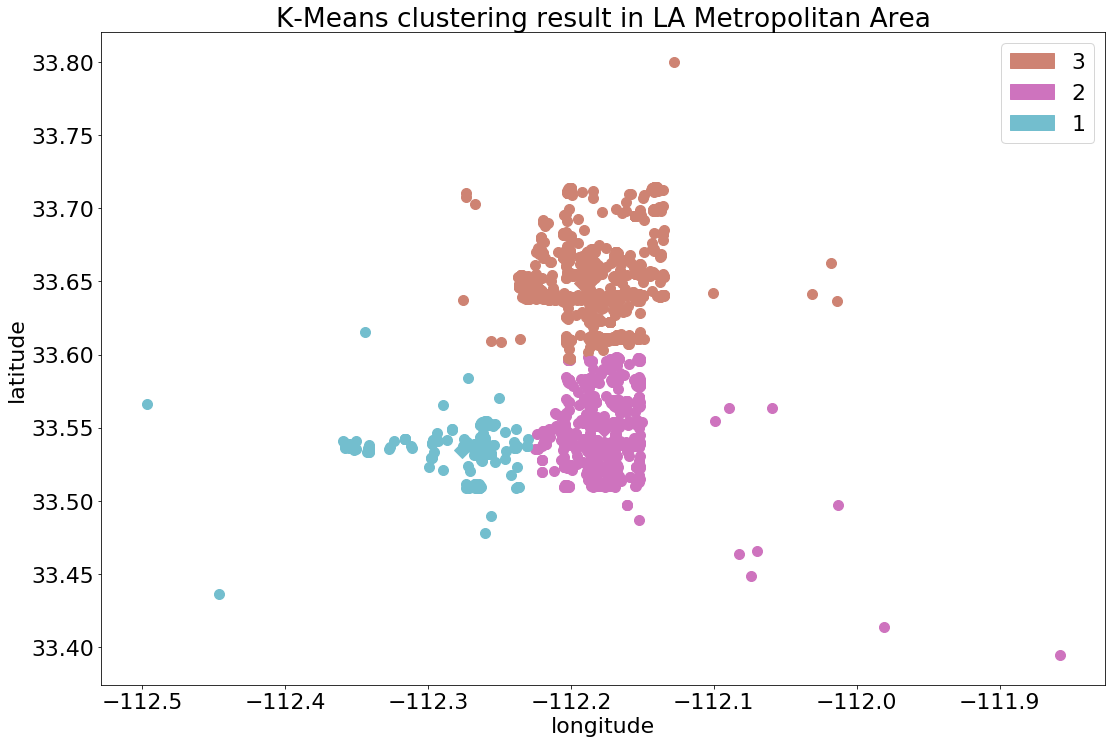

In [217]:
showCluster(location,3, kmeans.cluster_centers_, kmeans.labels_,maxLables,"kmeans_on_ratings.pdf")
# Location=np.array(location)

In [227]:
from sklearn import mixture
gmm = mixture.GMM(n_components=3,covariance_type='full')
gmm.fit(location)
gaussian = gmm.predict(location)
maxLables=cluster.attachLables(rating,gaussian,3)

avg:  [3.419753086419753, 3.3893429225237006, 3.141439205955335]
avg:  [3.14143921 3.38934292 3.41975309]
[3.14143921 3.38934292 3.41975309]
[2, 1, 0]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

In [234]:
gaussian

array([1, 1, 1, ..., 1, 1, 2])

In [235]:
location = df_bn[df_bn['city'].isin(df_LA.city)][['longitude','latitude']].reset_index(drop='True')
location_ = location[location['longitude']<-110]
location_['label'] = gaussian
location_.to_excel("/Users/yujinxie/Desktop/loc2.xlsx")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


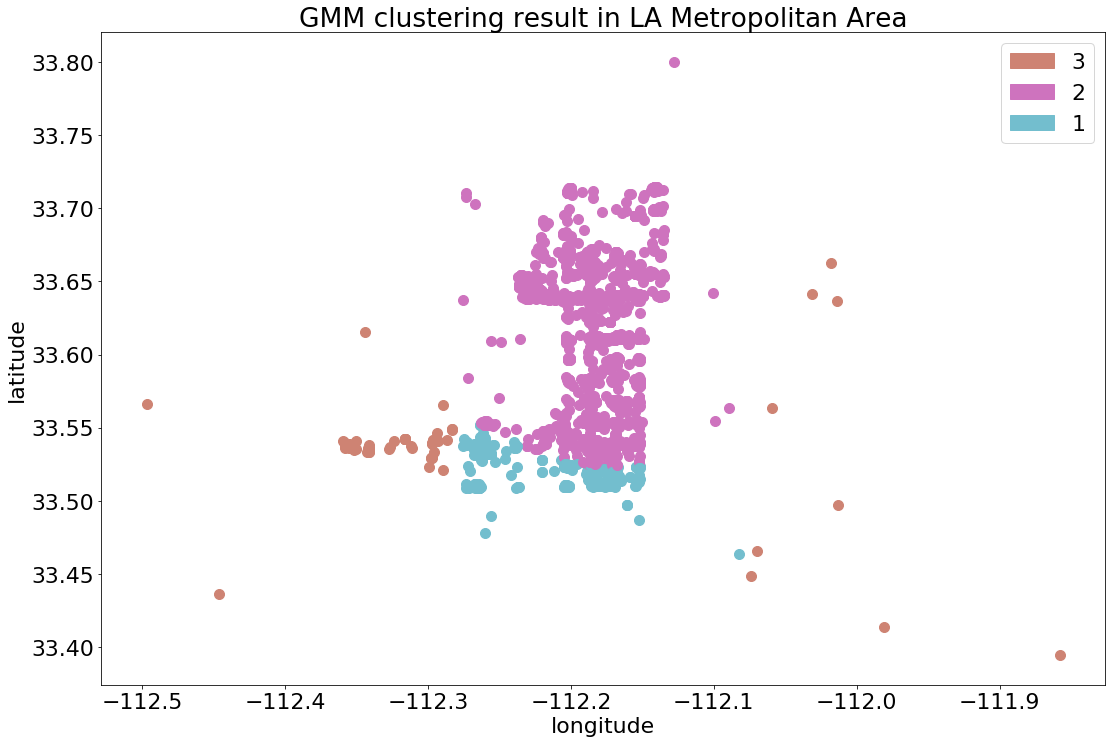

In [229]:
showCluster2(location,3, gaussian,maxLables,"gmm_on_ratings.pdf")
#Location=np.array(Location)